In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
salary_hike = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Assignment\\Simple Linear Regression\\Salary_Data.csv")

In [5]:
salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Data Visualization

Text(0, 0.5, 'Salary')

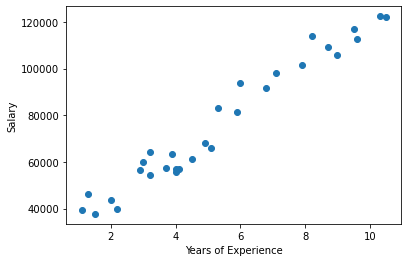

In [8]:
x = salary_hike.YearsExperience
y = salary_hike.Salary
plt.scatter(x,y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

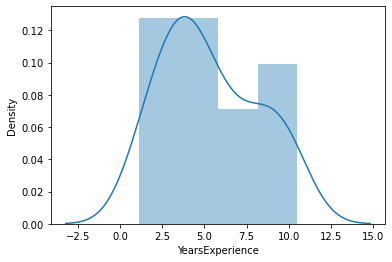

In [9]:
sns.distplot(salary_hike['YearsExperience'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

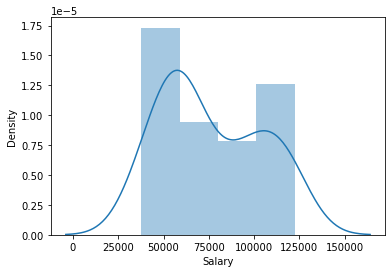

In [10]:
sns.distplot(salary_hike['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

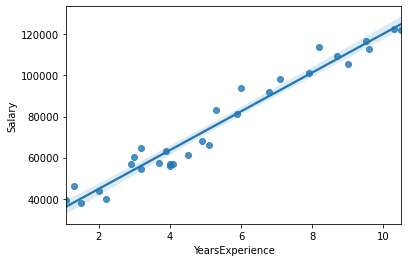

In [11]:
sns.regplot(x=salary_hike['YearsExperience'],y=salary_hike['Salary'])

#### Model Building

In [12]:
import statsmodels.formula.api as smf 
model = smf.ols("Salary~YearsExperience",data = salary_hike).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        11:28:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

#### Model Predictions

In [15]:
#Manual Calculation
Salary = 25792.200199 + (9449.9623) * (8) #8 = YearsExperience
Salary

101391.898599

In [16]:
newdata=pd.Series([8,11])

In [17]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [19]:
model.predict(data_pred)

0    101391.898770
1    129741.785735
dtype: float64

#### Applying Transformations

In [1]:
#Logarithmic Transformation

In [15]:
data1 = salary_hike.copy()

In [16]:
data1['Salary'] = np.log(data1['Salary'])
data1['YearsExperience'] = np.log(data1['YearsExperience'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

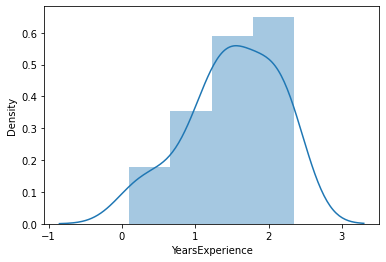

In [17]:
sns.distplot(data1['YearsExperience'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

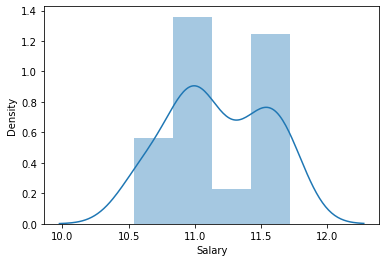

In [18]:
sns.distplot(data1['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

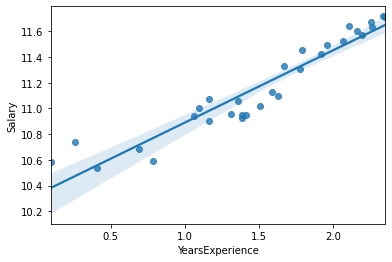

In [19]:
sns.regplot(x=data1['YearsExperience'],y=data1['Salary'])

In [20]:
model1 = smf.ols("Salary~YearsExperience",data = data1).fit()

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           7.40e-16
Time:                        11:31:11   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Apparently, the original model shows a better R-Squared value than the new model with logarithmic data. So we will move ahead to Square Root Transformation

In [22]:
#Square Root Transformation

In [30]:
data2 = salary_hike.copy()

In [31]:
data2['Salary'] = np.sqrt(data2['Salary'])
data2['YearsExperience'] = np.sqrt(data2['YearsExperience'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

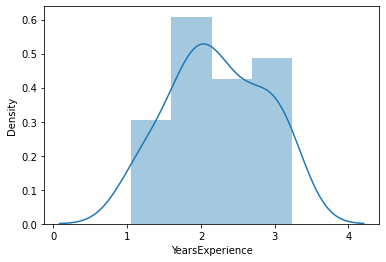

In [32]:
sns.distplot(data2['YearsExperience'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

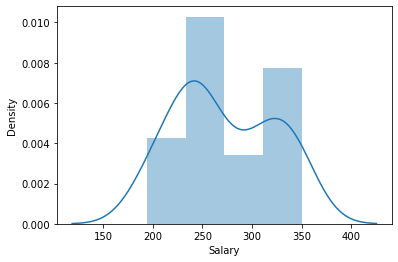

In [33]:
sns.distplot(data2['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

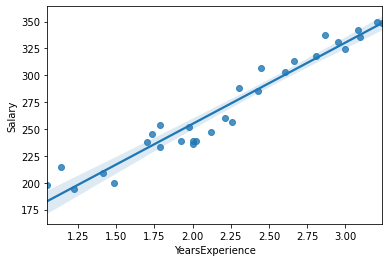

In [34]:
sns.regplot(x=data2['YearsExperience'],y=data2['Salary'])

In [35]:
model2 = smf.ols("Salary~YearsExperience",data = data2).fit()

In [36]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           7.58e-19
Time:                        11:34:40   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         103.5680      8.178     12.663      0.000      86.815     120.321
YearsExperience    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again we can see that the original model shows a marginally better R-Squared value as compared to the model with square root transformed data!!